In [104]:
import numpy as np
import matplotlib.pylab as plt
from skimage import color

In [113]:
def getBinaryImage(img, threshold, mode='upper'):
    if mode == 'upper':
        return img > threshold
    elif mode == 'lower':
        return img < threshold
    else:
        raise Exception("Mode not supported")

In [106]:
def checkIfBinary(image_name):
    if len(np.shape(image_name))==3:
        image_name = color.rgb2gray(image_name)
    x_axis_size,y_axis_size = np.shape(image_name)
    
    is_binary = True
    
    for i in range(0,x_axis_size-1):
        for j in range(0,y_axis_size-1):
            if (image_name[i][j]!=0 or image_name[i][j]!=1 ):
                is_binary=False
                break
        if is_binary:
            return image_name
        else:
            return getBinaryImage(image_name,np.mean(image_name))
            

In [107]:
def getImageSubset(img, i, j, SE, x_SE, y_SE):
    subset = []
    lowerBound_X = i - int(np.floor(x_SE / 2))
    upperBound_X = i + int(np.floor(x_SE / 2))
    lowerBound_Y = j - int(np.floor(y_SE / 2))
    upperBound_Y = j + int(np.floor(y_SE / 2))
    x_max, y_max = np.shape(img)
    for se_x, k in enumerate(range(lowerBound_X, upperBound_X+1)):
        for se_y, l in enumerate(range(lowerBound_Y, upperBound_Y+1)):
            if k < 0 or l < 0 or k > x_max or l > y_max:
                subset.append(0)
            elif k < x_max and l < y_max:
                subset.append(img[k,l] * SE[se_x - 1, se_y - 1])
    return subset

In [108]:
def dilateManually(img, SE = np.ones((3,3), np.uint8)):
    x_SE, y_SE = np.shape(SE)
    x, y = np.shape(img)
    img_dilate = np.zeros_like(img)
    for i in range(0, x - 1):
        for j in range(0, y - 1):
            img_dilate[i,j] = np.max(getImageSubset(img, i, j, SE, x_SE, y_SE))
    return img_dilate

In [109]:
def erodeManually(img, SE = np.ones((3,3), np.uint8)):
    x_SE, y_SE = np.shape(SE)
    x, y = np.shape(img)
    img_erode = np.zeros_like(img)
    for i in range(0, x - 1):
        for j in range(0, y - 1):
            img_erode[i,j] = np.min(getImageSubset(img, i, j, SE, x_SE, y_SE))
    return img_erode

In [110]:
def binaryMaskEdges(image_name,given_type='out',SE = np.ones((3,3), np.uint8)):
    image_name=checkIfBinary(image_name)
    if given_type=='out':
        return image_name^dilateManually(image_name,SE)
    elif given_type=='in':
         return image_name^erodeManually(image_name,SE)
    else:
        raise Exception("Given type not supported")

(-0.5, 814.5, 611.5, -0.5)

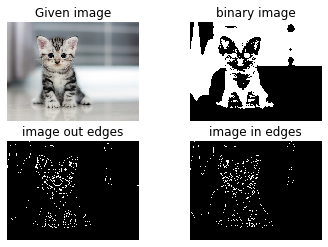

In [114]:
image = plt.imread('kotek.jpg')
binary_image = checkIfBinary(image)

plt.subplot(2,2,1)
plt.imshow(image,cmap='gray')
plt.title('Given image')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(binary_image,cmap='gray')
plt.title('binary image')
plt.axis('off')

image_out_edges=binaryMaskEdges(image)
plt.subplot(2,2,3)
plt.imshow(image_out_edges,cmap='gray')
plt.title('image out edges')
plt.axis('off')

image_in_edges=binaryMaskEdges(image,'in')
plt.subplot(2,2,4)
plt.imshow(image_in_edges,cmap='gray')
plt.title('image in edges')
plt.axis('off')

In [112]:
print(image.dtype)
print(binary_image.dtype)

uint8
bool
